#**HW2: Blind_Search**

Student ID: 6530182121 (Year 3, ENG IE)

Name: Thananop Kullapan

Lecture Video Clip: [Click here](https://www.youtube.com/watch?v=c2wqJ7wAjGQ&list=PLwnUv3sNB6_U0YnB05EUBOCXmbHf-oobp&index=1)

# Source Code

## Generate Network

In [ ]:
import networkx as nx

g = nx.DiGraph()
edges = {'S':'ABD', 'A':'BCE', 'B':'CDEG', 'C':'E', 'D':'EG', 'E':'G'}
edge_list = []

for s in edges.keys():        # For loop with dictionary
  for c in edges[s]:            # For loop with string
    edge_list.append((s,c))
    #print((s, c))

print(edge_list)

[('S', 'A'), ('S', 'B'), ('S', 'D'), ('A', 'B'), ('A', 'C'), ('A', 'E'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('B', 'G'), ('C', 'E'), ('D', 'E'), ('D', 'G'), ('E', 'G')]


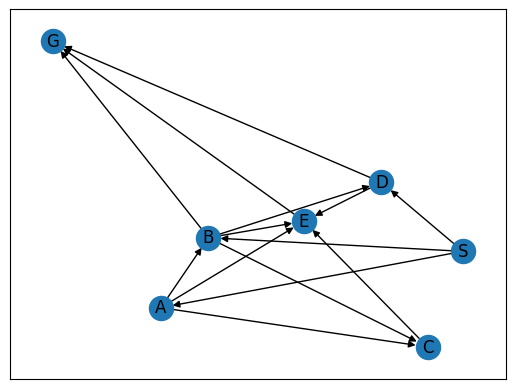

In [ ]:
## Generate Network of shortest-path network
g.add_edges_from(edge_list)
nx.draw_networkx(g)

## BFS

แตก Node ที่อยู่ตื้นที่สุดก่อน -> Frindge : **node ใหม่ใส่หลังสุด แล้ว remove node หน้าสุด**
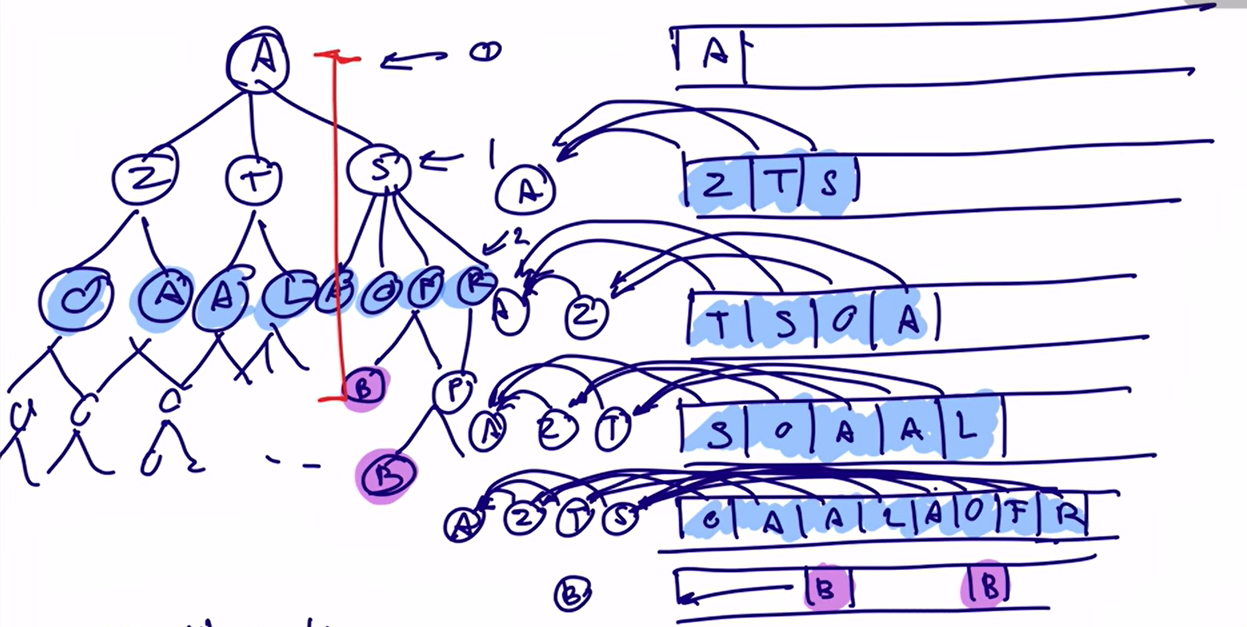

#--------------------------
Opimality : TRUE

Completness: TRUE

Time Complexity: O(b^d)

Space Complexity: O(b^d)

In [ ]:
last_index = 0
visited_node = []

def gen_successors(node):
    global last_index
    graph = {'S':'ABD','A':'BCE','B':'CDEG','C':'E','D':'EG','E':'G'}
    node_id = node[1]
    level = node[3]
    ret = []
    for c in graph[node[0]]:
        ret += [(c, last_index+1, node[1], node[3]+1)]
        last_index += 1
    return ret

def is_goal(node):
    return node[0] == 'G'

def insert_all(node,fringe):
    children = gen_successors(node)
    for child in children:
        fringe.append(child)
    print(fringe)

def show_result(g):
    global visited_node
    current_node = g
    parent_index = current_node[1]
    while True:
        print(current_node[0],end=' ')
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]

def bfs(start_node,limited_level):
    global last_index
    global visited_node
    last_index = 0
    fringe = [start_node]
    print(fringe)
    visited_node = {}
    while True:
        if len(fringe) == 0:
            print('Not Found')
            break

        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]

        if is_goal(front):
            show_result(front)
            return True
        if front[3] == limited_level:
            continue
        insert_all(front,fringe)

bfs(('S',0,-1,0),30)



[('S', 0, -1, 0)]
[('A', 1, 0, 1), ('B', 2, 0, 1), ('D', 3, 0, 1)]
[('B', 2, 0, 1), ('D', 3, 0, 1), ('B', 4, 1, 2), ('C', 5, 1, 2), ('E', 6, 1, 2)]
[('D', 3, 0, 1), ('B', 4, 1, 2), ('C', 5, 1, 2), ('E', 6, 1, 2), ('C', 7, 2, 2), ('D', 8, 2, 2), ('E', 9, 2, 2), ('G', 10, 2, 2)]
[('B', 4, 1, 2), ('C', 5, 1, 2), ('E', 6, 1, 2), ('C', 7, 2, 2), ('D', 8, 2, 2), ('E', 9, 2, 2), ('G', 10, 2, 2), ('E', 11, 3, 2), ('G', 12, 3, 2)]
[('C', 5, 1, 2), ('E', 6, 1, 2), ('C', 7, 2, 2), ('D', 8, 2, 2), ('E', 9, 2, 2), ('G', 10, 2, 2), ('E', 11, 3, 2), ('G', 12, 3, 2), ('C', 13, 4, 3), ('D', 14, 4, 3), ('E', 15, 4, 3), ('G', 16, 4, 3)]
[('E', 6, 1, 2), ('C', 7, 2, 2), ('D', 8, 2, 2), ('E', 9, 2, 2), ('G', 10, 2, 2), ('E', 11, 3, 2), ('G', 12, 3, 2), ('C', 13, 4, 3), ('D', 14, 4, 3), ('E', 15, 4, 3), ('G', 16, 4, 3), ('E', 17, 5, 3)]
[('C', 7, 2, 2), ('D', 8, 2, 2), ('E', 9, 2, 2), ('G', 10, 2, 2), ('E', 11, 3, 2), ('G', 12, 3, 2), ('C', 13, 4, 3), ('D', 14, 4, 3), ('E', 15, 4, 3), ('G', 16, 4, 3), ('E',

True

## DFS

แตก Node ที่อยู่ลึกที่สุดก่อน -> Frindge : **remove node ที่ fronted แล้วเพิ่ม node ใหม่ที่ fronted**

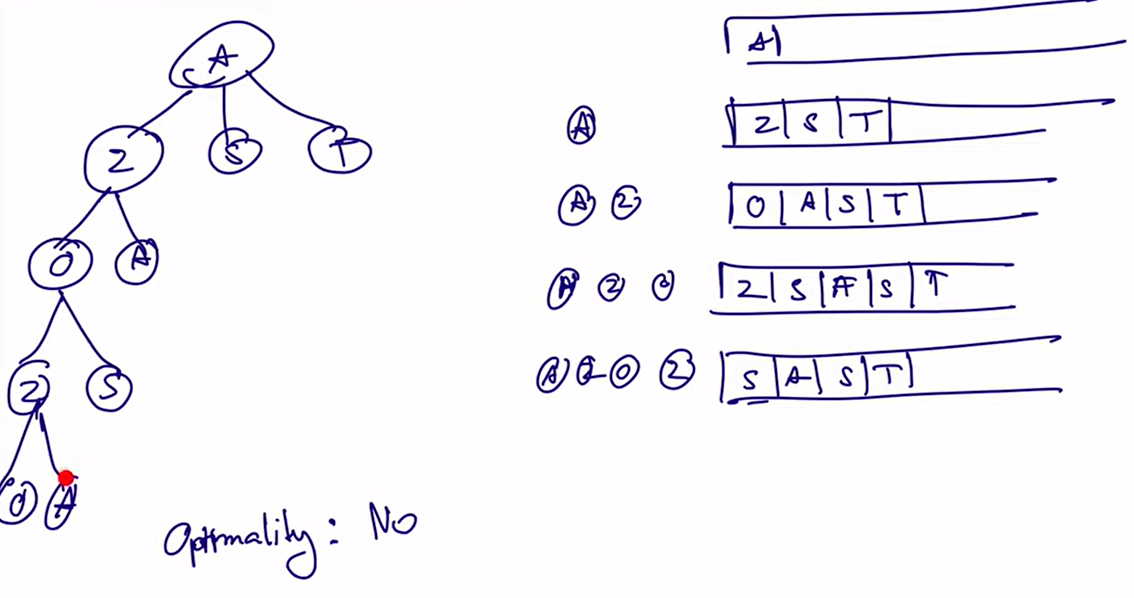
#--------------------------
Opimality : FALSE

Completness: FALSE

Time Complexity: O(b^m)

Space Complexity: O(bm)  <-- Can reduce memory to processing more than BFS but not show the optimal solution

In [ ]:
last_index = 0
visited_node = []

def gen_successors(node):
    global last_index
    graph = {'S':'ABD', 'A':'BCE', 'B':'CDEG', 'C':'E', 'D':'EG', 'E':'G'}
    node_id = node[1]
    level = node[3]
    ret = []
    for c in graph[node[0]]:
        ret += [ (c, last_index+1, node[1], node[3]+1) ]
        last_index += 1
    return ret

def is_goal(node):
    return node[0] == 'G'

def insert_all(node,fringe):
    children = gen_successors(node)
    for child in children:
        fringe[0:0] = [child]
    print(fringe)

def show_result(g):
    global visited_node
    current_node = g
    parent_index = current_node[1]
    while True:
        print(current_node[0],end=' ')
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]

def dfs(start_node,limited_level):
    global last_index
    global visited_node
    last_index = 0
    fringe = [start_node]
    print(fringe)
    visited_node = {}

    while True:
        if len(fringe) == 0:      # if fringe empty --> failure
            print('Not Found')
            break

        front = fringe[0]                      # remove node หน้าสุดก่อน
        visited_node[front[1]] = front
        fringe = fringe[1:]                   # add node ใหม่ที่ front

        if is_goal(front):
            show_result(front)
            return True
        if front[3] == limited_level:
            continue
        insert_all(front, fringe)

dfs(('S',0,-1,0),30)



[('S', 0, -1, 0)]
[('D', 3, 0, 1), ('B', 2, 0, 1), ('A', 1, 0, 1)]
[('G', 5, 3, 2), ('E', 4, 3, 2), ('B', 2, 0, 1), ('A', 1, 0, 1)]
G D S 

True

## IDS

search แบบ DFS แต่ limit ความลึกในแต่ละรอบ
`

```
# PSEUDOCODE
for m in range(number):
  DFS(m)
```
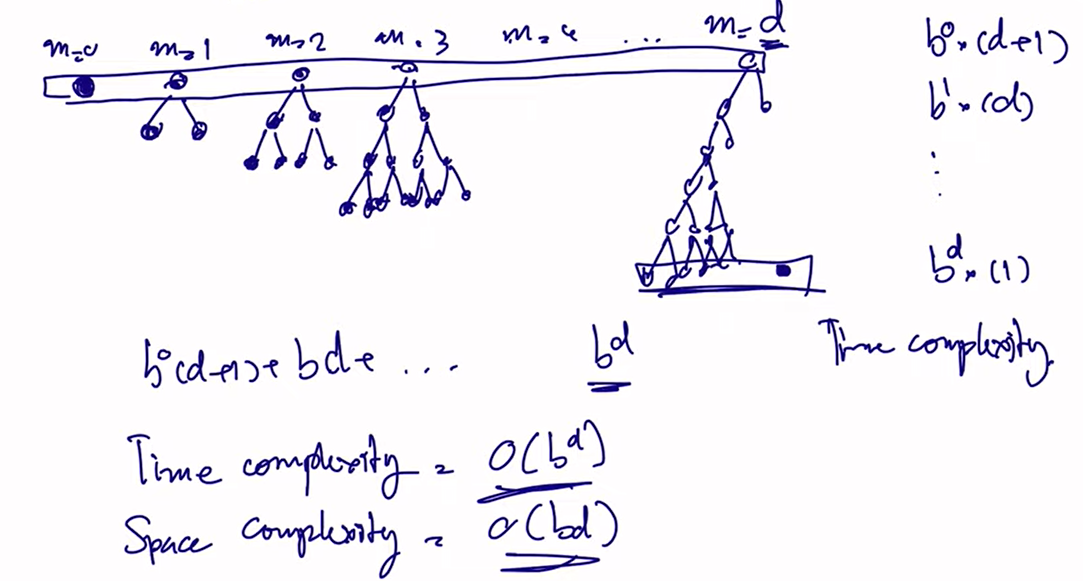


In [ ]:
last_index = 0
visited_node = []

def gen_successors(node):
    global last_index
    graph = {'S':'ABD','A':'BCE','B':'CDEG','C':'E','D':'EG','E':'G'}
    node_id = node[1]
    level = node[3]
    ret = []
    for c in graph[node[0]]:
        ret += [(c,last_index+1,node[1],node[3]+1)]
        last_index += 1
    return ret

def is_goal(node):
    return node[0] == 'G'

def insert_all(node,fringe):
    children = gen_successors(node)
    for child in children:
        fringe[0:0] = [child]
    print(fringe)

def show_result(g):
    global visited_node
    current_node = g
    parent_index = current_node[1]
    while True:
        print(current_node[0],end=' ')
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]

def dfs(start_node,limited_level):
    global last_index
    global visited_node
    last_index = 0
    fringe = [start_node]
    print(fringe)
    visited_node = {}
    while True:
        if len(fringe) == 0:
            print('Not Found')
            break

        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]

        if is_goal(front):
            show_result(front)
            return True
        if front[3] == limited_level:
            continue
        insert_all(front,fringe)

for i in range(100):
    print('Limit at level '+str(i))
    if dfs(('S',0,-1,0),i):
        break


Limit at level 0
[('S', 0, -1, 0)]
Not Found
Limit at level 1
[('S', 0, -1, 0)]
[('D', 3, 0, 1), ('B', 2, 0, 1), ('A', 1, 0, 1)]
Not Found
Limit at level 2
[('S', 0, -1, 0)]
[('D', 3, 0, 1), ('B', 2, 0, 1), ('A', 1, 0, 1)]
[('G', 5, 3, 2), ('E', 4, 3, 2), ('B', 2, 0, 1), ('A', 1, 0, 1)]
G D S 

# Homework

HW หาจำนวน Node ที่ถูก remove จาก front ของ fringe ของวิธี BFS เทียบกับ IDS ของปัญหา 8 Puzzle

## Function Algorithm ใช้ร่วม

#### คำอธิบายหลักการโค้ดฟังก์ชันต่างๆ

โค้ดนี้ดูเหมือนจะเกี่ยวข้องกับการแก้ปัญหา 8-puzzle โดยใช้การค้นหาแบบ Iterative Deepening Search (IDS) มาดูการทำงานของแต่ละฟังก์ชันกัน

### `gen_successors(node)`

ฟังก์ชันนี้ทำหน้าที่สร้างโหนดลูก (successors) จากโหนดปัจจุบัน `node`

* `node` จะอยู่ในรูปแบบ tuple ซึ่งประกอบด้วย
    * สถานะของปริศนา (ตำแหน่งของตัวเลข 0-8)
    * ID ของโหนด
    * ID ของโหนดพ่อแม่
    * ระดับความลึกของโหนดในต้นไม้ค้นหา
* `loc` คือตำแหน่งของช่องว่าง (เลข 0) ในปริศนา
* จากนั้นฟังก์ชันจะตรวจสอบว่าสามารถเลื่อนช่องว่างไปในทิศทางใดได้บ้าง (ซ้าย, ขวา, บน, ล่าง) โดยพิจารณาจากตำแหน่ง `loc`
* ถ้าสามารถเลื่อนได้ จะสร้างสถานะใหม่ `new_state` ที่เกิดจากการเลื่อนช่องว่าง และสร้างโหนดลูกใหม่พร้อมข้อมูลที่จำเป็น
* `last_index` เป็นตัวแปร global ที่ใช้กำหนด ID ให้กับโหนดใหม่ที่สร้างขึ้น
* สุดท้าย ฟังก์ชันจะ return list ของโหนดลูกที่สร้างขึ้น

### `is_goal(node)`

ฟังก์ชันนี้ตรวจสอบว่าโหนดที่กำหนด `node` เป็นสถานะเป้าหมายหรือไม่

* สถานะเป้าหมายคือ '8123456780' ซึ่งเป็นปริศนาที่เรียงตัวเลขถูกต้อง

### `insert_all(node, fringe)`

ฟังก์ชันนี้ทำหน้าที่เพิ่มโหนดลูกทั้งหมดของ `node` เข้าไปใน `fringe` ซึ่งเป็น list ที่ใช้ในการจัดการโหนดที่รอการสำรวจในการค้นหา

* `gen_successors(node)` จะถูกเรียกเพื่อสร้างโหนดลูกทั้งหมด
* โหนดลูกแต่ละโหนดจะถูกเพิ่มเข้าไปที่ตำแหน่งแรกของ `fringe` (prepend)

### `show_result(g, visited_node)`

ฟังก์ชันนี้ใช้แสดงผลลัพธ์ของการค้นหา

* `g` คือโหนดเป้าหมายที่พบ
* `visited_node` เป็น dictionary ที่เก็บโหนดที่เคยเยี่ยมชมแล้ว โดยใช้ ID ของโหนดเป็น key
* ฟังก์ชันจะไล่ย้อนกลับจากโหนดเป้าหมายไปยังโหนดเริ่มต้น โดยใช้ข้อมูล parent index ที่เก็บไว้ในแต่ละโหนด
* ในแต่ละขั้นตอน จะพิมพ์สถานะของปริศนาออกมาเป็น 3x3 grid

### `dfs(start_node, limited_level)`

ฟังก์ชันนี้ implement การค้นหาแบบจำกัดความลึก (Depth-Limited Search) ซึ่งเป็นส่วนหนึ่งของ Iterative Deepening Search (IDS)

* `start_node` คือโหนดเริ่มต้น
* `limited_level` คือระดับความลึกสูงสุดที่อนุญาตในการค้นหาครั้งนี้
* `fringe` เป็น list ที่ใช้ในการจัดการโหนดที่รอการสำรวจ
* `visited_node` เป็น dictionary ที่เก็บโหนดที่เคยเยี่ยมชมแล้ว
* ในแต่ละขั้นตอน
    * นำโหนด `front` ออกจาก `fringe`
    * ทำเครื่องหมายว่าเยี่ยมชม `front` แล้ว
    * ถ้า `front` เป็นเป้าหมาย ให้แสดงผลลัพธ์และ return `True`
    * ถ้า `front` อยู่ที่ระดับความลึก `limited_level` ให้ข้ามไปยังโหนดถัดไป
    * ไม่เช่นนั้น ให้สร้างโหนดลูกทั้งหมดของ `front` และเพิ่มเข้าไปใน `fringe`

### ลูป `for` หลัก

* ลูปนี้ทำหน้าที่วนซ้ำการค้นหาแบบจำกัดความลึก โดยเพิ่มระดับความลึกสูงสุดทีละ 1 ในแต่ละรอบ
* ถ้าพบเป้าหมายในรอบใดรอบหนึ่ง จะหยุดการค้นหา

โดยรวมแล้ว โค้ดนี้ใช้ Iterative Deepening Search (IDS) ในการแก้ปัญหา 8-puzzle โดยมีฟังก์ชัน `dfs` เป็นตัวขับเคลื่อนหลักในการค้นหาแต่ละระดับความลึก และฟังก์ชันอื่นๆ ช่วยในการสร้างโหนดลูก ตรวจสอบเป้าหมาย จัดการ fringe และแสดงผลลัพธ์

**หมายเหตุ:** โค้ดนี้ไม่ได้ implement การตรวจสอบว่าโหนดที่กำลังจะเพิ่มเข้าไปใน `fringe` เคยถูกเยี่ยมชมแล้วหรือไม่ ซึ่งอาจทำให้เกิดการสำรวจซ้ำซ้อนและลดประสิทธิภาพของการค้นหาได้ การเพิ่มกลไกการตรวจสอบโหนดที่เคยเยี่ยมชมแล้วจะช่วยปรับปรุงประสิทธิภาพของโค้ดนี้ได้

In [ ]:
last_index = 0
remove_count = 0
insert_count = 0

def gen_successors(node):
    global last_index
    node_id = node[1]
    level = node[3]
    ret = []
    state = node[0]
    loc = int(state[0])
    puzzle = state[1:]
    if loc % 3 != 0:
        new_state = str(loc-1) + puzzle[:loc-1] + puzzle[loc] + puzzle[loc-1] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('L'+new_state)
    if (loc+1) % 3 != 0:
        new_state = str(loc+1) + puzzle[:loc] + puzzle[loc+1] + puzzle[loc] + puzzle[loc+2:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('R'+new_state)
    if loc >= 3:
        new_state = str(loc-3) + puzzle[:loc-3] + puzzle[loc] + puzzle[loc-2:loc] + puzzle[loc-3] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('U'+new_state)
    if loc <= 5:
        new_state = str(loc+3) + puzzle[:loc] + puzzle[loc+3] + puzzle[loc+1:loc+3] + puzzle[loc] + puzzle[loc+4:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('D'+new_state)
    return ret

In [ ]:
def is_goal(node):
    return node[0] == '8123456780'

In [ ]:
def insert_all(node, fringe):
    children = gen_successors(node)
    for child in children:
        fringe.insert(0, child)

In [ ]:
def show_result(g,visited_node):
    current_node = g
    parent_index = current_node[1]
    while True:
        print(current_node[0][1:4])
        print(current_node[0][4:7])
        print(current_node[0][7:])
        print()
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]

## IDS for 8-Puzzle

**เซลล์ด้านล่างนี้เป็นเซลล์ของ IDS** ให้แก้โปรแกรมเพื่อหาจำนวน Node ที่ถูก remove และถูก insert เข้าไปใน fringe

ปล. จากการแกะตัวเลขของตัวอย่างจาก TA คิดว่าเป็นการนับจำนวนแบบสะสมทุก ๆ ค่า m ของ for loop สุดท้าย ไม่ใช่ที่ล่าสุดนะ

#### หลักการ

ฟังก์ชันนี้ทำการค้นหาแบบจำกัดความลึก (Depth-Limited Search - DLS) ซึ่งเป็นส่วนสำคัญของการค้นหาแบบ Iterative Deepening Search (IDS) ที่ใช้ในการแก้ปัญหา 8-puzzle

**Input:**

* `start_node`: โหนดเริ่มต้น (สถานะปัจจุบันของปริศนา, ID ของโหนด, ID ของโหนดพ่อแม่, ระดับความลึก)
* `limited_level`: ขีดจำกัดความลึกในการค้นหาครั้งนี้

**Output:**

* `True, nodes_removed, nodes_inserted`: ถ้าพบเป้าหมาย (สถานะปริศนาที่แก้แล้ว) พร้อมจำนวนโหนดที่ถูกนำออกและเพิ่มเข้าไปใน fringe
* `False, nodes_removed, nodes_inserted`: ถ้าไม่พบเป้าหมายภายในขีดจำกัดความลึกที่กำหนด พร้อมจำนวนโหนดที่ถูกนำออกและเพิ่มเข้าไปใน fringe

**การทำงาน:**

1. **เตรียมการ:**
   * กำหนดค่า `last_index` เป็น 0 เพื่อใช้ในการกำหนด ID ให้กับโหนดใหม่
   * สร้าง `fringe` ซึ่งเป็น list ที่เริ่มต้นด้วย `start_node` เพื่อเก็บโหนดที่รอการสำรวจ
   * สร้าง `visited_node` ซึ่งเป็น dictionary เพื่อเก็บโหนดที่เคยเยี่ยมชมแล้ว (ใช้ ID ของโหนดเป็น key)
   * กำหนดค่าเริ่มต้น `nodes_removed` เป็น 0 และ `nodes_inserted` เป็น 1 (เนื่องจากมีโหนดเริ่มต้นอยู่ใน fringe แล้ว)

2. **ลูปหลัก:**
   * ทำงานวนซ้ำจนกว่า `fringe` จะว่างเปล่า หรือพบเป้าหมาย
   * ถ้า `fringe` ว่างเปล่า แสดงข้อความ "Not Found" และหยุดการค้นหา
   * นำโหนดแรก `front` ออกจาก `fringe`
   * เพิ่ม `front` เข้าไปใน `visited_node`
   * เพิ่มค่า `nodes_removed`
   * ถ้า `front` เป็นเป้าหมาย (ตรวจสอบโดย `is_goal(front)`) แสดงผลลัพธ์ด้วย `show_result` และ return `True` พร้อมจำนวนโหนดที่ถูกนำออกและเพิ่มเข้าไป
   * ถ้า `front` อยู่ที่ระดับความลึกเท่ากับ `limited_level` ให้ข้ามไปยังรอบถัดไปของลูป (ไม่สำรวจโหนดที่ลึกเกินขีดจำกัด)
   * ไม่เช่นนั้น สร้างโหนดลูก `children` ของ `front` ด้วย `gen_successors(front)`
   * เพิ่มค่า `nodes_inserted` ด้วยจำนวนของ `children`
   * เพิ่ม `children` ทั้งหมดเข้าไปใน `fringe` ที่ตำแหน่งแรกสุด (prepend)

3. **ส่งค่ากลับ:**
   * ถ้าไม่พบเป้าหมายภายในขีดจำกัดความลึก ให้ return `False` พร้อมจำนวนโหนดที่ถูกนำออกและเพิ่มเข้าไป

**สรุป:** ฟังก์ชันนี้ทำการค้นหาแบบจำกัดความลึก (DLS) โดยเริ่มจาก `start_node` และสำรวจโหนดต่าง ๆ ในกราฟการค้นหาตามลำดับความลึกก่อน (depth-first) โดยจำกัดความลึกไว้ที่ `limited_level` ถ้าพบเป้าหมายจะแสดงผลลัพธ์และหยุดการค้นหา ถ้าไม่พบจะ return `False` และข้อมูลจำนวนโหนดที่ถูกนำออกและเพิ่มเข้าไป ซึ่งจะถูกใช้ในการคำนวณสรุปผลในส่วนอื่น ๆ ของโปรแกรมต่อไป

#### Code

In [ ]:
def dfs(start_node,limited_level):
    global last_index
    last_index = 0
    fringe = [start_node]
    visited_node = {}
    nodes_removed = 0  # เพิ่มตัวแปรนับจำนวนโหนดที่ถูก remove
    nodes_inserted = 1  # เพิ่มตัวแปรนับจำนวนโหนดที่ถูก insert

    while True:
        if len(fringe) == 0:
            print('Not Found')
            break

        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]
        nodes_removed += 1  # เพิ่มจำนวนโหนดที่ถูก remove

        if is_goal(front):
            show_result(front, visited_node)
            return True, nodes_removed, nodes_inserted # ส่งค่ากลับกรณีพบ

        if front[3] == limited_level:
            continue

        children = gen_successors(front)  # สร้าง children นอก insert_all
        nodes_inserted += len(children)  # เพิ่มจำนวนโหนดที่ถูก insert
        for child in children:
            fringe[0:0] = [child]

    return False, nodes_removed, nodes_inserted  # ส่งค่ากลับกรณีไม่พบ

In [ ]:
total_nodes_removed = 0
total_nodes_inserted = 0

for i in range(14):
    print("Limit Search at level " + str(i + 1))
    found, nodes_removed, nodes_inserted = dfs(('8413256780', 0, -1, 0), i)
    total_nodes_removed += nodes_removed
    total_nodes_inserted += nodes_inserted

    if found:
        break

print("Total nodes removed:", total_nodes_removed)
print("Total nodes inserted:", total_nodes_inserted)

Limit Search at level 1
Not Found
Limit Search at level 2
Not Found
Limit Search at level 3
Not Found
Limit Search at level 4
Not Found
Limit Search at level 5
Not Found
Limit Search at level 6
Not Found
Limit Search at level 7
Not Found
Limit Search at level 8
Not Found
Limit Search at level 9
123
456
780

123
450
786

123
405
786

103
425
786

013
425
786

413
025
786

413
205
786

413
250
786

413
256
780

Total nodes removed: 4678
Total nodes inserted: 4685


## Hint

In [ ]:
data=[1,2,3,4,5,6,7]
data.pop(-1)
data

[1, 2, 3, 4, 5, 6]

In [ ]:
data.insert(0,'a')
data.insert(-1,'b')
data.append('c')
data

['a', 1, 2, 3, 4, 5, 'b', 6, 'c']

In [ ]:
data[:-1]

['a', 1, 2, 3, 4, 5, 'b', 6]

## BFS 8 Puzzle

HW แก้โปรแกรมเพื่อหาจำนวน Node ที่ถูก remove จาก fringe และจำนวน Node ที่ถูกใส่เข้าไปใน fringe

#### หลักการที่อธิบาย

ฟังก์ชันนี้ทำการค้นหาแบบ Breadth-First Search (BFS) เพื่อแก้ปัญหา 8-puzzle

**Input:**

* `start_node`: โหนดเริ่มต้น (สถานะปัจจุบันของปริศนา, ID ของโหนด, ID ของโหนดพ่อแม่, ระดับความลึก)

**Output:**

* `True, removed_count, added_count`: ถ้าพบเป้าหมาย (สถานะปริศนาที่แก้แล้ว) พร้อมจำนวนโหนดที่ถูกนำออกและเพิ่มเข้าไปใน fringe
* `False, removed_count, added_count`: ถ้าไม่พบเป้าหมาย พร้อมจำนวนโหนดที่ถูกนำออกและเพิ่มเข้าไปใน fringe

**การทำงาน:**

1. **เตรียมการ:**
   * กำหนดค่า `last_index` เป็น 0 เพื่อใช้ในการกำหนด ID ให้กับโหนดใหม่
   * สร้าง `fringe` ซึ่งเป็น list ที่เริ่มต้นด้วย `start_node` เพื่อเก็บโหนดที่รอการสำรวจ
   * สร้าง `visited_node` ซึ่งเป็น dictionary เพื่อเก็บโหนดที่เคยเยี่ยมชมแล้ว (ใช้ ID ของโหนดเป็น key)
   * กำหนดค่าเริ่มต้น `removed_count` เป็น 0 และ `added_count` เป็น 1 (เนื่องจากมีโหนดเริ่มต้นอยู่ใน fringe แล้ว)

2. **ลูปหลัก:**
   * ทำงานวนซ้ำจนกว่า `fringe` จะว่างเปล่า หรือพบเป้าหมาย
   * นำโหนดแรก `front` ออกจาก `fringe` (ใช้ `.pop(0)` เพื่อนำออกจากด้านหน้า ซึ่งเป็นลักษณะของ BFS)
   * เพิ่มค่า `removed_count`
   * เพิ่ม `front` เข้าไปใน `visited_node`
   * ถ้า `front` เป็นเป้าหมาย (ตรวจสอบโดย `is_goal(front)`) แสดงผลลัพธ์ด้วย `show_result` และ return `True` พร้อมจำนวนโหนดที่ถูกนำออกและเพิ่มเข้าไป
   * สร้างโหนดลูก `children` ของ `front` ด้วย `gen_successors(front)`
   * เพิ่ม `children` ทั้งหมดเข้าไปใน `fringe` ที่ด้านท้าย (append) ซึ่งเป็นลักษณะของ BFS
   * เพิ่มค่า `added_count` ด้วยจำนวนของ `children`

3. **ส่งค่ากลับ:**
   * ถ้าไม่พบเป้าหมาย (ลูปสิ้นสุดเนื่องจาก `fringe` ว่างเปล่า) ให้ return `False` พร้อมจำนวนโหนดที่ถูกนำออกและเพิ่มเข้าไป

**สรุป:** ฟังก์ชันนี้ทำการค้นหาแบบ Breadth-First Search (BFS) โดยเริ่มจาก `start_node` และสำรวจโหนดต่าง ๆ ในกราฟการค้นหาตามลำดับชั้น (level) ถ้าพบเป้าหมายจะแสดงผลลัพธ์และหยุดการค้นหา ถ้าไม่พบจะ return `False` และข้อมูลจำนวนโหนดที่ถูกนำออกและเพิ่มเข้าไป ซึ่งสามารถใช้ในการวิเคราะห์ประสิทธิภาพของการค้นหาได้

#### Codes

In [ ]:
def bfs(start_node):
    global last_index
    last_index = 0
    fringe = [start_node]
    visited_node = {}
    removed_count = 0
    added_count = 1 #นับ loop เริ่มต้น

    while fringe:
        front = fringe.pop(0)
        removed_count += 1
        visited_node[front[1]] = front

        if is_goal(front):
            show_result(front, visited_node)
            return True, removed_count, added_count

        children = gen_successors(front)
        fringe.extend(children)
        added_count += len(children)

    return False, removed_count, added_count

In [ ]:
found, removed, added = bfs(('8413256780', 0, -1, 0))
print("BFS: removed =", removed, "added =", added)

123
456
780

123
456
708

123
406
758

103
426
758

013
426
758

413
026
758

413
206
758

413
256
708

413
256
780

BFS: removed = 2496 added = 7043


## Example

### Testcase function

In [ ]:
# IDS
def testcase_ids(initial_state, iterative):
  total_nodes_removed = 0
  total_nodes_inserted = 0

  for i in range(iterative):
    if(i >= 1): print("#-----------------------------------------")
    print("Limit Search at level "+str(i+1))
    found, nodes_removed, nodes_inserted = dfs((initial_state,0,-1,0),i)
    total_nodes_removed += nodes_removed
    total_nodes_inserted += nodes_inserted
    print("Nodes removed in this iteration:", nodes_removed) # แสดงจำนวนโหนดที่ถูก remove ในรอบนี้
    print("Nodes inserted in this iteration:", nodes_inserted) # แสดงจำนวนโหนดที่ถูก insert ในรอบนี้
    if found:
        break
  print("")
  print("Total nodes removed:", total_nodes_removed)
  print("Total nodes inserted:", total_nodes_inserted)

# BFS
def testcase_bfs(initial_state):
    found, removed, inserted = bfs((initial_state, 0, -1, 0))
    print("Inserted:", inserted, 'nodes')
    print("Removed:", removed, 'nodes')

In [ ]:
def testcase_all(initial_state, iterative):
  print("Initial State: ", initial_state)
  print()

  print("----- IDS -----")
  testcase_ids(initial_state, iterative)
  print("#=====================================")
  print("----- BFS -----")
  testcase_bfs(initial_state)

### Testcase from TA

In [ ]:
len("7123485706")

10

In [ ]:
initial_state_1 = '7123485706'
testcase_all(initial_state_1, 14)

Initial State:  7123485706

----- IDS -----
Limit Search at level 1
Not Found
Nodes removed in this iteration: 1
Nodes inserted in this iteration: 1
#-----------------------------------------
Limit Search at level 2
Not Found
Nodes removed in this iteration: 4
Nodes inserted in this iteration: 4
#-----------------------------------------
Limit Search at level 3
Not Found
Nodes removed in this iteration: 12
Nodes inserted in this iteration: 12
#-----------------------------------------
Limit Search at level 4
123
456
780

123
450
786

123
405
786

123
485
706

Nodes removed in this iteration: 12
Nodes inserted in this iteration: 17

Total nodes removed: 29
Total nodes inserted: 34
#=====================================
----- BFS -----
123
456
780

123
450
786

123
405
786

123
485
706

Inserted: 82 nodes
Removed: 30 nodes


In [ ]:
initial_state_2 = '2130425786'
testcase_all(initial_state_2, 14)

Initial State:  2130425786

----- IDS -----
Limit Search at level 1
Not Found
Nodes removed in this iteration: 1
Nodes inserted in this iteration: 1
#-----------------------------------------
Limit Search at level 2
Not Found
Nodes removed in this iteration: 3
Nodes inserted in this iteration: 3
#-----------------------------------------
Limit Search at level 3
Not Found
Nodes removed in this iteration: 9
Nodes inserted in this iteration: 9
#-----------------------------------------
Limit Search at level 4
Not Found
Nodes removed in this iteration: 25
Nodes inserted in this iteration: 25
#-----------------------------------------
Limit Search at level 5
123
456
780

123
450
786

123
405
786

103
425
786

130
425
786

Nodes removed in this iteration: 49
Nodes inserted in this iteration: 54

Total nodes removed: 87
Total nodes inserted: 92
#=====================================
----- BFS -----
123
456
780

123
450
786

123
405
786

103
425
786

130
425
786

Inserted: 119 nodes
Removed: 4

In [ ]:
initial_state_3 = '7123456708'
testcase_all(initial_state_3, 14)

Initial State:  7123456708

----- IDS -----
Limit Search at level 1
Not Found
Nodes removed in this iteration: 1
Nodes inserted in this iteration: 1
#-----------------------------------------
Limit Search at level 2
123
456
780

123
456
708

Nodes removed in this iteration: 3
Nodes inserted in this iteration: 4

Total nodes removed: 4
Total nodes inserted: 5
#=====================================
----- BFS -----
123
456
780

123
456
708

Inserted: 6 nodes
Removed: 3 nodes


In [ ]:
initial_state_4 = '8123456780'
testcase_all(initial_state_4, 2)

Initial State:  8123456780

----- IDS -----
Limit Search at level 1
123
456
780

Nodes removed in this iteration: 1
Nodes inserted in this iteration: 1

Total nodes removed: 1
Total nodes inserted: 1
#=====================================
----- BFS -----
123
456
780

Inserted: 1 nodes
Removed: 1 nodes


In [ ]:
initial_state_5 = '8876543210'
testcase_all(initial_state_5, 2)

Initial State:  8876543210

----- IDS -----
Limit Search at level 1
Not Found
Nodes removed in this iteration: 1
Nodes inserted in this iteration: 1
#-----------------------------------------
Limit Search at level 2
Not Found
Nodes removed in this iteration: 3
Nodes inserted in this iteration: 3

Total nodes removed: 4
Total nodes inserted: 4
#=====================================
----- BFS -----


KeyboardInterrupt: 